In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [25]:
df = pd.read_csv('insurance.csv', skiprows = 6, names = ['Number of claims', 'Total payment'])
df

,Number of claims,Total payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [26]:
df.shape

(63, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number of claims  63 non-null     int64  
 1   Total payment     63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [28]:
df.isnull().sum()

Number of claims    0
Total payment       0
dtype: int64

## Data Analysis

<AxesSubplot:xlabel='Number of claims', ylabel='Total payment'>

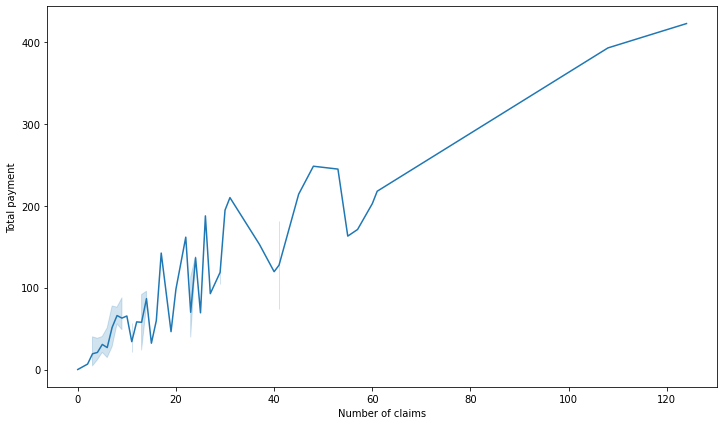

In [29]:
plt.figure(figsize = (12, 7))
sns.lineplot(x = 'Number of claims', y = 'Total payment', data = df)

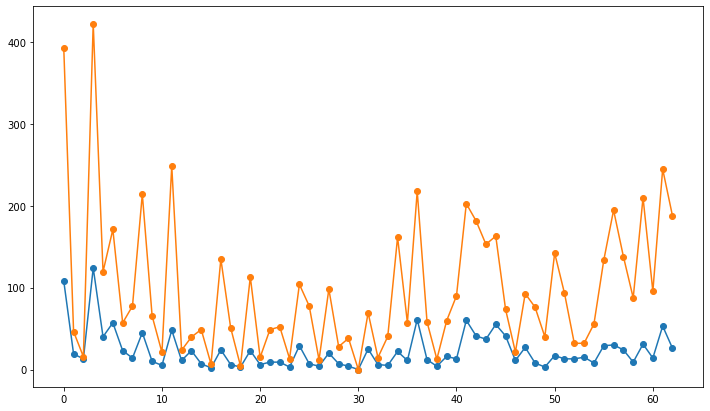

In [35]:
plt.figure(figsize = (12, 7))
plt.plot('Number of claims','-o', data = df)
plt.plot('Total payment','-o', data = df)

<AxesSubplot:xlabel='Number of claims', ylabel='Total payment'>

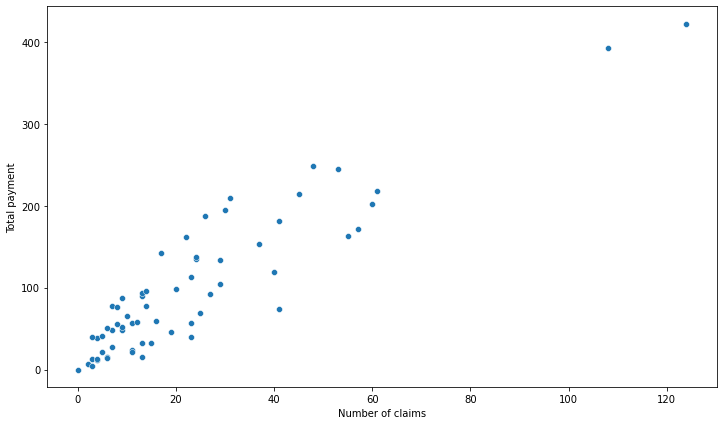

In [30]:
plt.figure(figsize = (12, 7))
sns.scatterplot(x = 'Number of claims', y = 'Total payment', data = df)

## Split Data

In [288]:
X = df['Number of claims']
y  = df['Total payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
print('Shape of X_train ->', X_train.shape)
print('Shape of X_test ->' , X_test.shape)
print('Shape of y_train ->' , y_train.shape)
print('Shape of y_test ->' , y_test.shape)

Shape of X_train -> (50,)
Shape of X_test -> (13,)
Shape of y_train -> (50,)
Shape of y_test -> (13,)


## Feature Scaling

In [136]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_sc = sc.fit_transform(np.array(X_test).reshape(-1, 1))
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

## Train Data

In [138]:
## Linear Regression

# with scaling
from sklearn.linear_model import LinearRegression
lr_sc = LinearRegression()
lr_sc.fit(X_train_sc, y_train)
lr_sc.score(X_test_sc, y_test)


0.6586928357516204

In [140]:
# without scaling

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7081760363964843

In [141]:
## Ridge Regression

# with scaling

from sklearn.linear_model import Ridge
r_sc = Ridge(alpha = 13)
r_sc.fit(X_train_sc, y_train)
r_sc.score(X_test_sc, y_test)

0.7119690397994333

In [150]:
# without scaling

r = Ridge()
r.fit(X_train, y_train)
r.score(X_test, y_test)

0.7081694732413545

In [151]:
## Lasso Regression

# with scaling

from sklearn.linear_model import Lasso
l_sc = Lasso(alpha = 17)
l_sc.fit(X_train_sc, y_train)
l_sc.score(X_test_sc, y_test)

0.7119678297377074

In [155]:
# without scaling

l = Lasso()
l.fit(X_train, y_train)
l.score(X_test, y_test)

0.7080778612029438

In [169]:
## KNN Regression

# with scaling

from sklearn.neighbors import KNeighborsRegressor
knn_sc = KNeighborsRegressor(n_neighbors=4)
knn_sc.fit(X_train_sc, y_train)
knn_sc.score(X_test_sc, y_test)

0.7878889776534682

In [182]:
# without scaling

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7354630227918963

In [196]:
## SVR

# with scaling

from sklearn.svm import SVR
svr_sc = SVR(kernel='linear')
svr_sc.fit(X_train_sc, y_train)
svr_sc.score(X_test_sc, y_test)

0.48315361371164867

In [200]:
# without scaling

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.6994613231435434

In [208]:
## Decision Tree Regression

# with scaling

from sklearn.tree import DecisionTreeRegressor
dt_sc = DecisionTreeRegressor()
dt_sc.fit(X_train_sc, y_train)
dt_sc.score(X_test_sc, y_test)

0.07300884012108066

In [209]:
# without scaling

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.735201891099502

In [217]:
## Random Forest Regression

# with scaling

from sklearn.ensemble import RandomForestRegressor
rf_sc = RandomForestRegressor(criterion = 'mae')
rf_sc.fit(X_train_sc, y_train)
rf_sc.score(X_test_sc, y_test)

0.5778039575316107

In [282]:
# without scaling 

rf = RandomForestRegressor(criterion = 'mae', n_estimators=197)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7550086898189153

## Model Performance

In [283]:
y_pred = knn_sc.predict(X_test_sc)
y_pred2 = knn_sc.predict(X_train_sc)

In [287]:
r2_score(y_test, y_pred)

0.7878889776534682

In [279]:
mp = pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ['Number of Claims', 'Actual Payment', 'Predicted Payment'])
mp

,Number of Claims,Actual Payment,Predicted Payment
0,19.0,46.2,86.850
1,7.0,27.9,27.975
2,31.0,209.8,147.025
3,0.0,0.0,15.875
4,11.0,23.5,50.475
5,25.0,69.2,135.950
6,7.0,77.5,27.975
7,26.0,187.5,142.650
8,29.0,133.3,131.725
9,6.0,14.6,23.750


In [284]:
mp2 = pd.DataFrame(np.c_[X_train, y_train, y_pred2], columns = ['Number of Claims', 'Actual Payment', 'Predicted Payment'])
mp2

,Number of Claims,Actual Payment,Predicted Payment
0,23.0,56.9,92.750
1,5.0,40.3,27.975
2,29.0,103.9,132.225
3,11.0,57.2,50.475
4,108.0,392.5,297.000
5,17.0,142.1,82.975
6,41.0,181.3,131.725
7,30.0,194.5,132.225
8,13.0,93.0,57.625
9,11.0,21.3,50.475


<AxesSubplot:xlabel='Number of Claims', ylabel='Actual Payment'>

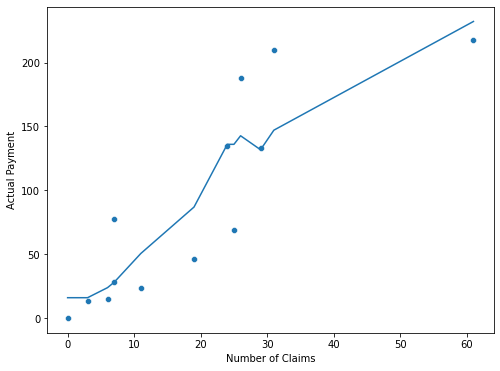

In [280]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Number of Claims', y = 'Actual Payment', data = mp)
sns.lineplot(x = 'Number of Claims', y = 'Predicted Payment', data = mp)

<AxesSubplot:xlabel='Number of Claims', ylabel='Actual Payment'>

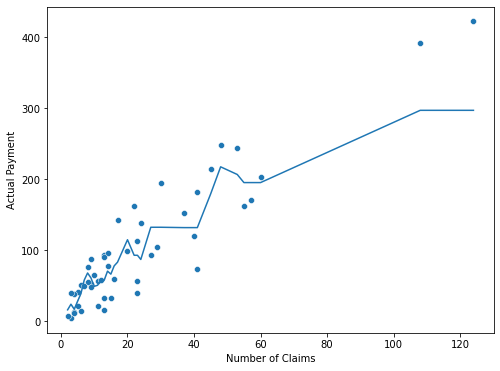

In [285]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Number of Claims', y = 'Actual Payment', data = mp2)
sns.lineplot(x = 'Number of Claims', y = 'Predicted Payment', data = mp2)